<div style="border:5px solid #85929e; border-radius:10px; padding:10px; padding-top:50px; background-color:#2c2c2c">
<img src="https://www.fisdom.com/wp-content/uploads/2021/09/145.jpg" style="width: 600px; display: block; margin:auto; ">
<p style="margin-top:20px;font-size: 35px; text-align: center; color: #1baad4 ; font-weight: bold;">🪙Adult Income NoteBook💵</p></div>


# **Content**
1. [**Read Data & EDA🔎**](#Read-Data-&-EDA📊)
    - [**Univariate Analysis**](#Univariate-Analysis)
        - *Categorical*
        - *Quantitative*
    - [**Bivariate Analysis**](#Bivariate-Analysis)   
    - [**Multivariate Analysis**](#Multivariate-Analysis)
2. [**Data Preprocessing**](#Data-Preprocessing⚙️)
    - [**Handling Duplicates**](#Handling-Duplicates)
    - [**Handling Null Values**](#Handling-Null-Values)
    - [**Handling Outliers**](#Handling-Outliers)
    - [**Feature Engineer & Feature Selection🧐**](#Feature-Engineer-&-Feature-Selection🧐)
    - [**Spliting & Handling Imbalanced Data⚖️**](#Spliting-&-Handling-Imbalanced-Data⚖️)
    - [**Scaling📏**](#Scaling📏)
3. [**Working On Models🤖**](#Working_On_Models🤖)
    - [**Logistic Regression**](#Logistic-Regression)
        - *Training Model*
        - *Model Evaluation*
    - [**Decision Tree**](#Decision-Tree)
        - *Hyperparameters Tuning `(Defferential Evaluation)`*
        - *Training Model*
        - *Model Evaluation*
    - [**Random Forest**](#Random-Forest)
        - *Hyperparameters Tuning `(Defferential Evaluation)`*
        - *Training Model*
        - *Model Evaluation*
    - [**KNN**](#KNN)
        - *Hyperparameters Tuning `(GridSearch Cross Validation)`*
        - *Training Model*
        - *Model Evaluation*
    - [**XGBoosting**](#XGBoosting)
        - *Hyperparameters Tuning `(Defferential Evaluation)`*
        - *Training Model*
        - *Model Evaluation*

# **Import Libraries**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy.optimize import differential_evolution
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')

# **Read Data & EDA📊**

In [111]:
df = pd.read_csv("adult.csv")
print("\n","="*52,"Head Of data","="*52,"\n")
display(df.head())
print("\n","="*52,"Tail Of data","="*52,"\n")
display(df.tail())


 ==================================================== Head Of data ==================================================== 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



 ==================================================== Tail Of data ==================================================== 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px; background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight:bold;">From Head & Tail we findout :</p>
<p style="color:#ffffff;font-weight:bold;">
1. There is missing values have value "?"<br>
2. All data in native-country column has value "United-States" so may be US is the most country in dataset<br>
3. Each education has its own educational-num<br></p>
<hr>
<p style="font-size: 17px; color:#f1415c; font-weight: bold;">All this informations we notice from only first 5 rows and last 5 rows we need to get more info</p>
</div>


> **Replace '?' with `Nan`**

In [112]:
df.replace('?',np.nan,inplace=True)

In [113]:
print("\n","="*20,"Shape Of data","="*20,"\n")
print(df.shape)
print("\n","\b","="*15,"Informations about data","="*15,"\n")
print(df.info())


 ==================== Shape Of data ==================== 

(48842, 15)

 =============== Informations about data =============== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  o


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold;">From informations we find out there is null values in:</p>
<p style="color:#ffffff;font-weight:bold;">
1. Column "worlclass"<br>
2. Column "occupation"<br>
3. Column "native-country"<p>
</div>

In [114]:
print("\n","="*25,"Describtion about data","="*25,"\n")
display(df.describe())


 ========================= Describtion about data ========================= 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## **Univariate Analysis**

### **Categorial columns analysis**

In [115]:
categorial_data = df.select_dtypes(include="object")
for col in categorial_data.columns:
    print(f"{col.capitalize()}: {len(df[col].unique())}\n")
    print("="*80)
print(f"Number of categorial columns = {categorial_data.shape[1]}")

Workclass: 9

Education: 16

Marital-status: 7

Occupation: 15

Relationship: 6

Race: 5

Gender: 2

Native-country: 42

Income: 2

Number of categorial columns = 9


   
> **Workclass column**


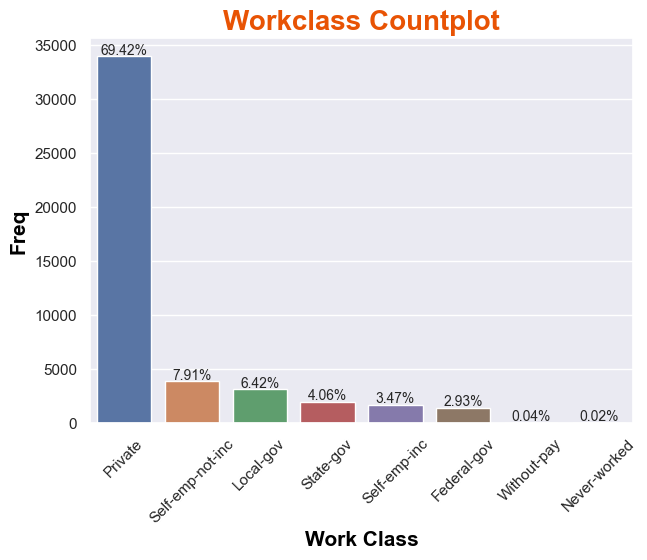


 ################################################## Frequency table ################################################## 



,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [116]:
work_values = df["workclass"].value_counts()
fig , axis = plt.subplots(figsize=(7,5))
##################################Bar Chart##################################
plt.title("Workclass Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="workclass",order = work_values.index)
plt.xlabel("Work Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(work_values)):
    text = f"{work_values.values[idx]*100/len(df):.2f}%"
    plt.text(x=idx,y=work_values.values[idx]+180,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(work_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

In [117]:
print("Null values in workclass column =",df.workclass.isna().sum())

Null values in workclass column = 2799



<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis workclass we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Private category is the majority category so in the most this feature will not be useful for our model<br>
    - Column have 2795 null row</p>
</div>

  
> **Education column**


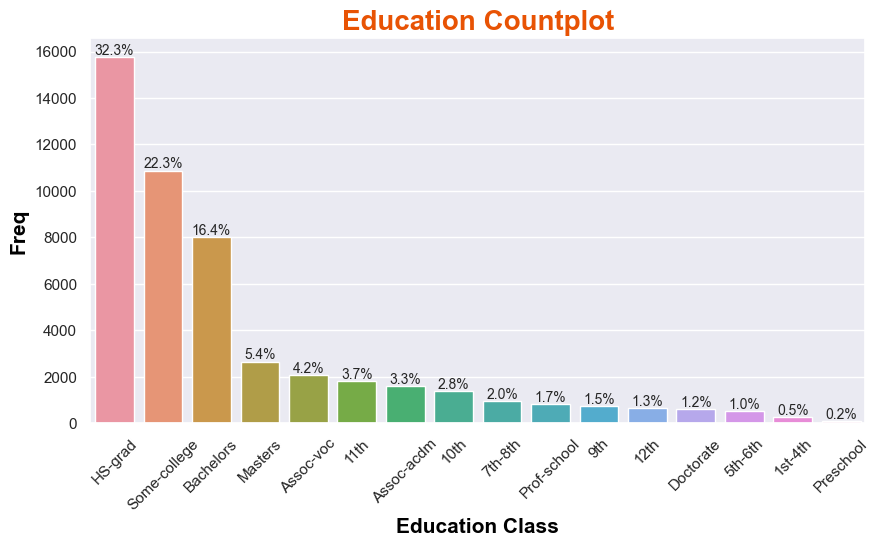

In [118]:
education_values = df["education"].value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Education Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="education",order = education_values.index)
plt.xlabel("Education Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(education_values)):
    text = f"{education_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=education_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis education we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - HS-grad, Some-college, and Bachelors categories are the majority categories and other columns have low frequency</p>
</div>

 
> **Marital-status column**


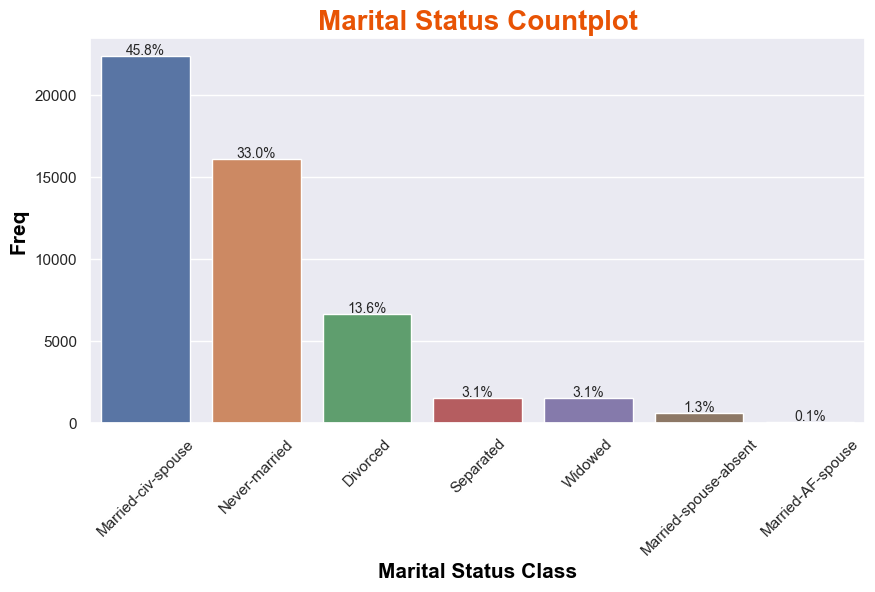


 ################################################## Frequency table ################################################## 



,marital-status
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [119]:
marital_values = df["marital-status"].value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Marital Status Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="marital-status",order = marital_values.index)
plt.xlabel("Marital Status Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(marital_values)):
    text = f"{marital_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=marital_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(marital_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Marital Status we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Married-civ-spouse, Never-married, and Divorced are the majority categories
    <br>
    - Sparated, Widowed, Married-spouse-absent, and Married-AF-spouse minority categories
    </p>

</div>

   
> **Occupation column**


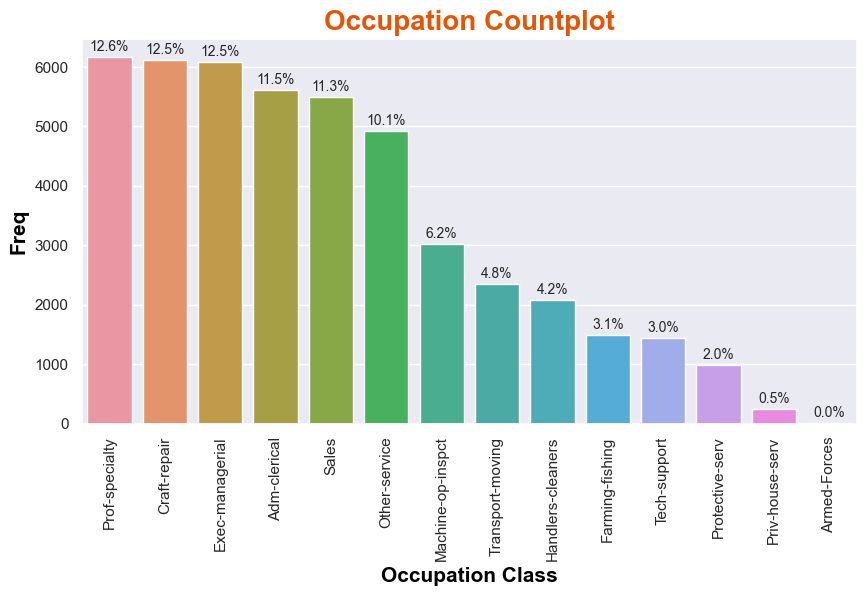


 ################################################## Frequency table ################################################## 



,occupation
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072
Farming-fishing,1490


In [120]:
occu_values = df.occupation.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Occupation Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="occupation",order = occu_values.index)
plt.xlabel("Occupation Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=90)
for idx in range(len(occu_values)):
    text = f"{occu_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=occu_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(occu_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

In [121]:
print("Null values in occupation Status column =",df["occupation"].isnull().sum())

Null values in occupation Status column = 2809



<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis occupation we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Armed-Forces & Priv-house-serv category is the minority category <br>
    - this column have 2805 null row </p>

</div>

     
> **Relationship column**   


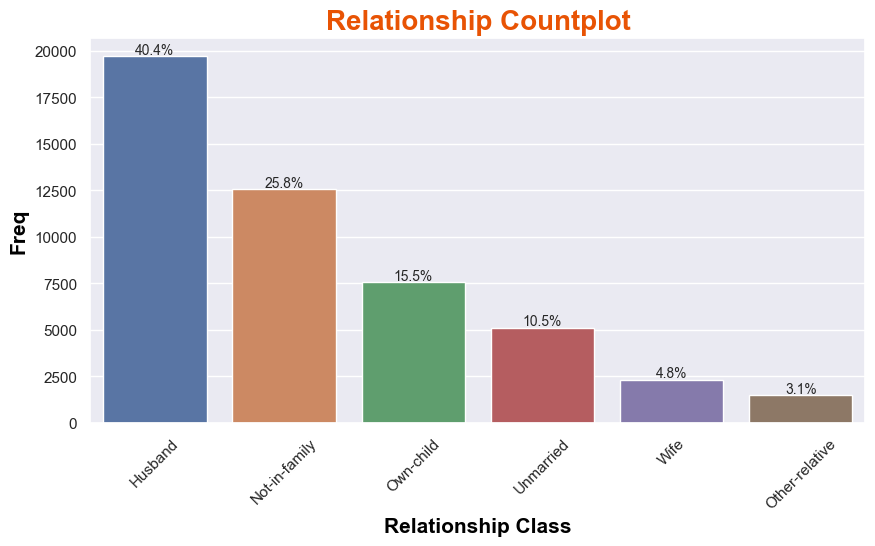


 ################################################## Frequency table ################################################## 



,relationship
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [122]:
relation_values=df.relationship.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Relationship Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="relationship",order = relation_values.index)
plt.xlabel("Relationship Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(relation_values)):
    text = f"{relation_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=relation_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(relation_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Relationship we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Husband category is the majority category  </p>
</div>


  
> **Race column**


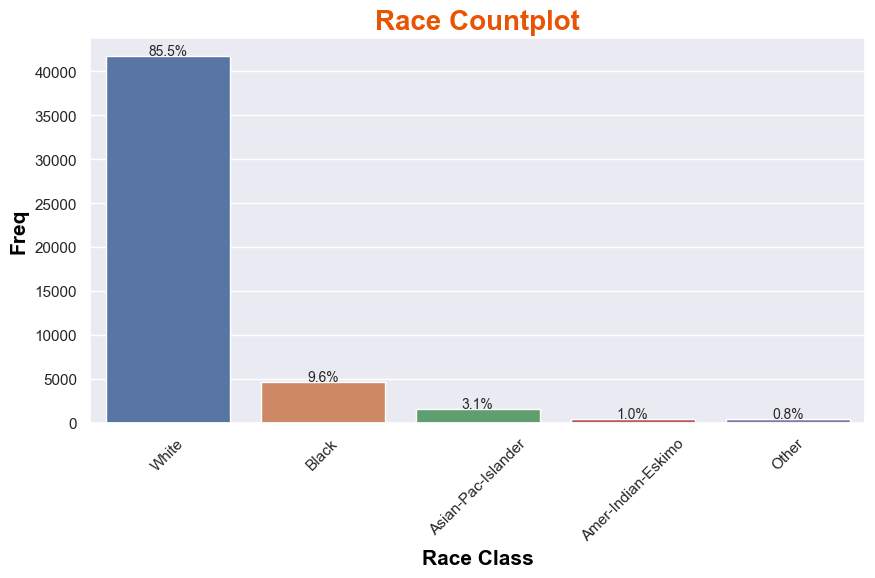


 ################################################## Frequency table ################################################## 



,race
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [123]:
race_values = df.race.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Race Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="race",order = race_values.index)
plt.xlabel("Race Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(race_values)):
    text = f"{race_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=race_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(race_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Race we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - White category is the majority category so in the most this feature will not be useful for our ML model</p>
</div>

  
> **Native Country column**   


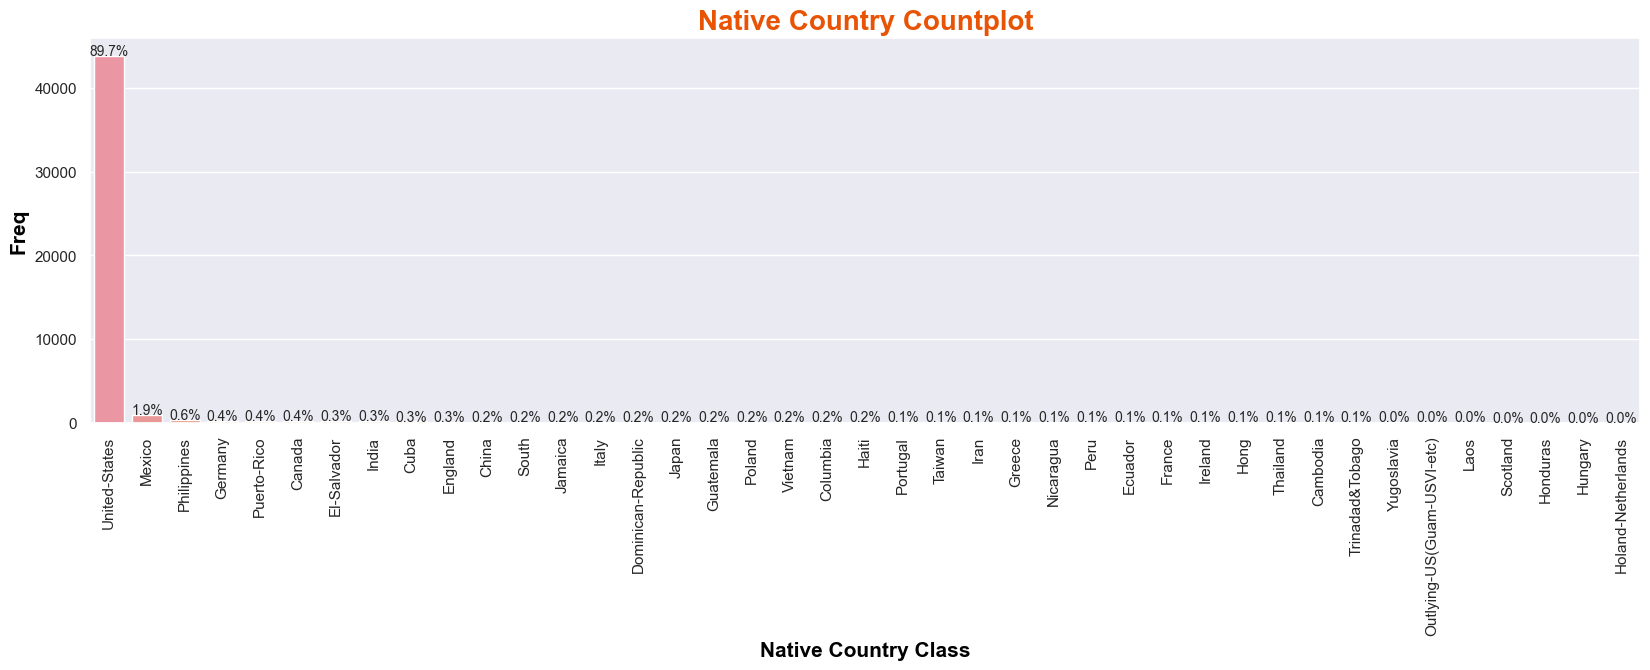

In [124]:
native_country_values = df["native-country"].value_counts()
fig , axis = plt.subplots(figsize=(20,5))
##################################Bar Chart##################################
plt.title("Native Country Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="native-country",order = native_country_values.index)
plt.xlabel("Native Country Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=90)
for idx in range(len(native_country_values)):
    text = f"{native_country_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=native_country_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()

In [125]:
print("Null values in Native Country column =",df["native-country"].isnull().sum())

Null values in Native Country column = 857



<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Native Country we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - United States category is the majority category so in the most this column will reduce our accuracy and will not be useful for ML moel <br>
    - have 856 null rows</p>

</div>


> **Gender column**   


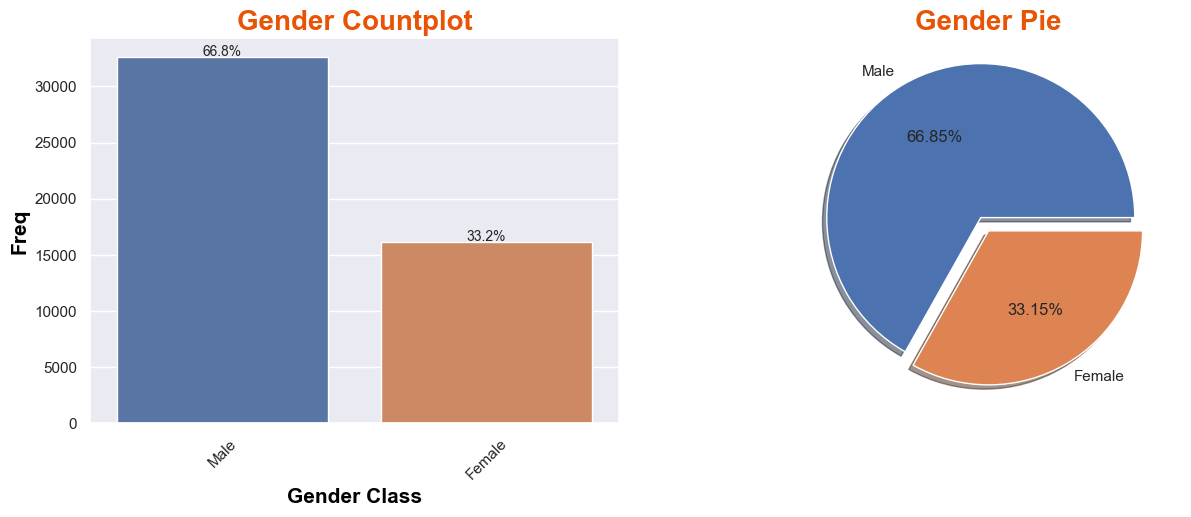


 ################################################## Frequency table ################################################## 



,gender
Male,32650
Female,16192


In [126]:
gender_values = df.gender.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Gender Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="gender",order = gender_values.index,ax=axis[0])
axis[0].set_xlabel("Gender Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
axis[0].tick_params(axis='x', labelrotation=45)
for idx in range(len(gender_values)):
    text = f"{gender_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=gender_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(gender_values.values,labels=gender_values.index,autopct="%.2f%%",explode=[0.1,0],shadow=True)
axis[1].set_title("Gender Pie",fontsize=20,color='#e85304',weight="bold")
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(gender_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Gender we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Male category is the majority category
    <br><br>
    - Female category is the minority category
    </p>

</div>

   
> **Income column**   


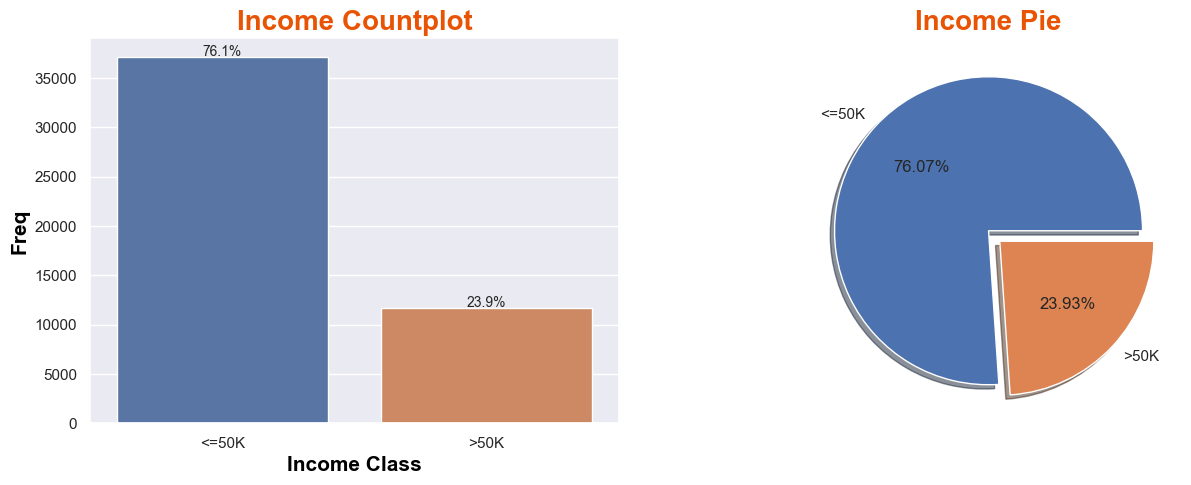


 ################################################## Frequency table ################################################## 



,income
<=50K,37155
>50K,11687


In [127]:
income_values = df.income.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Income Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="income",order = income_values.index,ax=axis[0])
axis[0].set_xlabel("Income Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
for idx in range(len(income_values)):
    text = f"{income_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=income_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(income_values.values,labels=income_values.index,explode=[0,0.1],shadow=True,autopct="%.2f%%")
axis[1].set_title("Income Pie",color='#e85304',fontsize=20,weight="bold")
plt.show()

print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(income_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Income we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Target column imbalanced<br><br>
    - &lt=50k category is the majority category</p>
</div>

### **Quantitative Data**

In [128]:
quantitative_columns = df.select_dtypes(exclude="object")
for col in quantitative_columns:
    print(col.capitalize())

Age
Fnlwgt
Educational-num
Capital-gain
Capital-loss
Hours-per-week


  
> **Age column**   


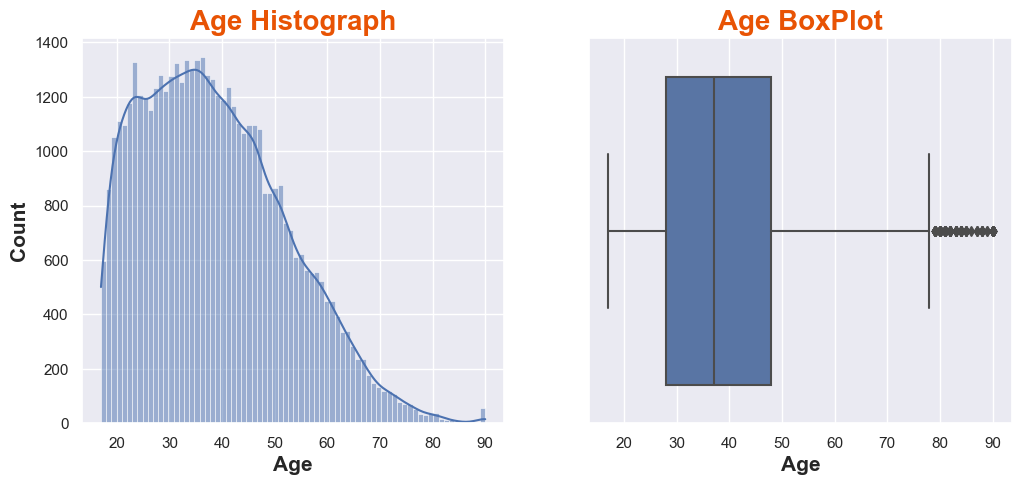

In [129]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
########################Histplot###############################################
sns.histplot(data=df,x="age",ax=axis[0],bins="rice",kde=True)
axis[0].set_title("Age Histograph",fontsize=20,color="#e85304",weight="bold")
axis[0].set_xlabel("Age",fontsize=15,weight="bold")
axis[0].set_ylabel("Count",fontsize=15,weight="bold")
########################Boxplot###############################################
sns.boxplot(data=df,x="age",ax=axis[1])
axis[1].set_title("Age BoxPlot",fontsize=20,color="#e85304",weight="bold")
axis[1].set_xlabel("Age",fontsize=15,weight="bold")
plt.show()


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Age we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Age distribution right skewed<br><br>
    - Age column have outliers need to handle</p>
</div>

 
> **fnlwgt column**
>
>    - fnlwgt column will not important because we have other columns give us the answer and we have different states
        - If you want to understand what is fnlwgt columns check comments [fnlwgt column meaning](https://www.kaggle.com/datasets/uciml/adult-census-income/discussion/32698)



> **Educational Num column**
>
>    - it is like encoding to education column and we do analysis for this column</p>



> Capital Gain & Capital Loss column
>
>
>I will try create new column `Capital Column` with values :
>- loss ( if person have capital loss )
>- gain ( if person have capital gain )
>- neither ( no loss & no gain)




In [130]:
df["capital_val"]=df["capital-gain"]-df['capital-loss']
df["capital"]=df["capital_val"]
df.loc[df["capital_val"]>0,"capital"]="gain"
df.loc[df["capital_val"]<0,"capital"]="loss"
df.loc[df["capital_val"]==0,"capital"]="neither"
income_col=df["income"]
df.drop(["capital-gain","capital-loss","capital_val","income"],axis=1,inplace=True)
df["income"]=income_col
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,neither,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,neither,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,neither,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,gain,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,neither,<=50K


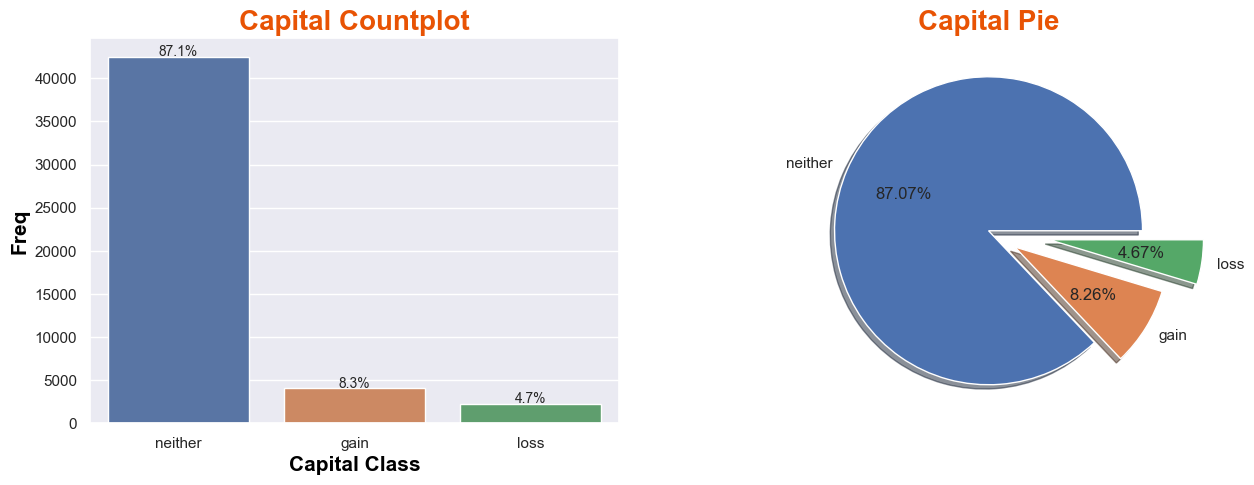


 ################################################## Frequency table ################################################## 



,capital
neither,42525
gain,4035
loss,2282


In [131]:
capital_values = df.capital.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Capital Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="capital",order = capital_values.index,ax=axis[0])
axis[0].set_xlabel("Capital Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
for idx in range(len(capital_values)):
    text = f"{capital_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=capital_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(capital_values.values,labels=capital_values.index,explode=[0,0.2,0.4],shadow=True,autopct="%.2f%%")
axis[1].set_title("Capital Pie",color='#e85304',fontsize=20,weight="bold")
plt.show()

print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(capital_values)
# freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

  
> **Hours per Week column**    


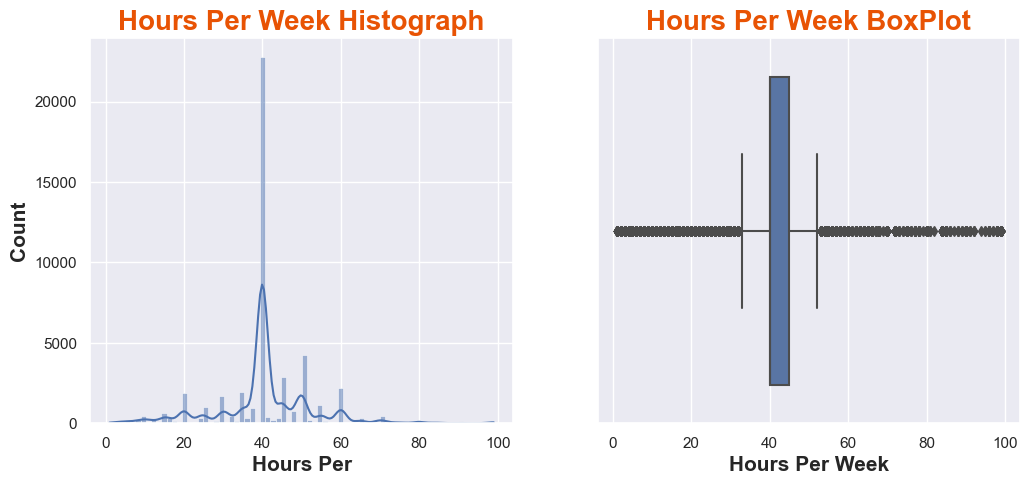

In [132]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
########################Histplot###############################################
sns.histplot(data=df,x="hours-per-week",ax=axis[0],bins="rice",kde=True)
axis[0].set_title("Hours Per Week Histograph",fontsize=20,color="#e85304",weight="bold")
axis[0].set_xlabel("Hours Per",fontsize=15,weight="bold")
axis[0].set_ylabel("Count",fontsize=15,weight="bold")
########################Boxplot###############################################
sns.boxplot(data=df,x="hours-per-week",ax=axis[1])
axis[1].set_title("Hours Per Week BoxPlot",fontsize=20,color="#e85304",weight="bold")
axis[1].set_xlabel("Hours Per Week",fontsize=15,weight="bold")
plt.show()

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Hours per week we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Hours per week column have outliers need to handle</p>
</div>

## **Bivariate Analysis**


> **Replace missing values with `unknown` trying to know the type of missing values in analysis**


In [133]:
df_analysis=df.copy()
df_analysis.fillna({"workclass":"unknown","occupation":"unknown","native-country":"unknown"},inplace=True)
print(df_analysis.select_dtypes(include="object").columns.tolist())

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'capital', 'income']


In [134]:
def categorial_analysis(col1:str,col2:str):
    freq_table_main = pd.crosstab(df_analysis[col1],
                                  df_analysis[col2],
                                  margins=True,
                                  margins_name="Count")
    freq_table=round((freq_table_main.div(freq_table_main["Count"],axis=0) * 100),2).iloc[:-1]
    display(freq_table)

  
> **Workclass vs Marital Status**


In [135]:
categorial_analysis("workclass","marital-status")

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Count
workclass,,,,,,,,
Federal-gov,16.62,0.21,50.35,1.05,25.70,2.72,3.35,100.0
Local-gov,16.87,0.00,48.98,1.05,25.45,3.19,4.46,100.0
Never-worked,10.00,0.00,10.00,10.00,70.00,0.00,0.00,100.0
Private,13.87,0.07,42.69,1.34,36.11,3.30,2.63,100.0
Self-emp-inc,8.61,0.00,74.57,0.47,12.45,1.47,2.42,100.0
Self-emp-not-inc,11.19,0.08,66.13,1.24,15.87,2.20,3.29,100.0
State-gov,15.95,0.10,44.93,1.26,32.10,3.28,2.37,100.0
Without-pay,0.00,0.00,61.90,4.76,28.57,0.00,4.76,100.0
unknown,9.61,0.18,33.12,1.57,44.12,3.47,7.93,100.0


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Work Class with Marital Status we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - The most persons who Never worked are Never married like unknown category in work class so may be Nan values represent persons never worked<br><br>
    - The most people who worked in gov like (Federal-gov), (Local-gov), or (State gov)  being Married-civ-spouse, Never-married, or Divorced<br><br>
    </p>
</div>

  
> **Occupation vs Marital Status**


In [136]:
categorial_analysis("occupation","marital-status")

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Count
occupation,,,,,,,,
Adm-clerical,21.24,0.11,26.64,1.50,42.06,3.99,4.46,100.0
Armed-Forces,0.00,0.00,46.67,0.00,53.33,0.00,0.00,100.0
Craft-repair,11.11,0.07,62.47,1.26,21.29,2.62,1.19,100.0
Exec-managerial,14.62,0.05,59.15,0.85,20.70,2.07,2.55,100.0
Farming-fishing,6.04,0.07,58.32,2.35,29.13,1.54,2.55,100.0
Handlers-cleaners,9.51,0.05,34.94,1.54,49.66,3.04,1.25,100.0
Machine-op-inspct,14.36,0.03,48.61,1.22,28.86,4.07,2.85,100.0
Other-service,15.48,0.10,22.10,1.87,49.60,5.59,5.26,100.0
Priv-house-serv,19.01,0.00,11.16,3.72,40.91,8.68,16.53,100.0


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Occupation and Marital status we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - "unknown" percentage in occupation column `with marital-status` with similar values of column work-class </p>
</div>

     
> **Workclass vs Occupation**


In [137]:
categorial_analysis("workclass","occupation")

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,unknown,Count
workclass,,,,,,,,,,,,,,,,
Federal-gov,34.01,1.05,6.49,18.72,0.63,2.51,1.33,3.84,0.00,17.67,3.28,1.19,6.70,2.58,0.0,100.0
Local-gov,13.42,0.00,6.73,10.55,1.37,2.07,0.77,9.57,0.00,33.83,14.35,0.51,1.85,4.97,0.0,100.0
Never-worked,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0,100.0
Private,12.41,0.00,14.00,11.78,1.98,5.67,8.50,11.97,0.71,10.05,0.88,13.09,3.40,5.54,0.0,100.0
Self-emp-inc,2.77,0.00,9.85,36.40,4.84,0.35,1.00,2.48,0.00,14.45,0.29,24.78,0.53,2.24,0.0,100.0
Self-emp-not-inc,1.81,0.00,20.66,15.20,16.91,0.54,1.53,7.15,0.00,14.89,0.18,15.30,1.09,4.74,0.0,100.0
State-gov,18.93,0.00,4.75,14.49,1.26,0.96,0.96,9.64,0.00,31.75,8.83,1.01,4.39,3.03,0.0,100.0
Without-pay,14.29,0.00,4.76,4.76,38.10,9.52,9.52,9.52,0.00,0.00,0.00,4.76,0.00,4.76,0.0,100.0
unknown,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0,100.0


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Work Class and Occupation we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - people whose Never-worked have null value in occupation (MNAR)
    <br><br>
    - people whose has null values in occupation are have null value in work class or never worked (MAR)
    <br>
       
</p> <p style="color:#ffffff;margin-left:30px;font-style:italic;">
. So from insights in (workclass & occupation), (workclass & marital-status), and (occupation & marital-status) I will assume unknown values as Never-worked people or create new category `unknown jobs`
        </p>
    
</div>


> **Income vs Occupation**  


In [138]:
categorial_analysis("income","occupation")

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,unknown,Count
income,,,,,,,,,,,,,,,,
<=50K,13.03,0.03,12.73,8.55,3.54,5.21,7.13,12.70,0.64,9.12,1.82,10.84,2.76,5.04,6.85,100.0
>50K,6.57,0.04,11.83,24.88,1.48,1.18,3.18,1.75,0.03,23.82,2.64,12.62,3.59,4.12,2.27,100.0


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Income and Occupation we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - the most of people who takes more than 50k are Exec-managerial or Prof-specialty
    <br><br>
    - the most of people who takes less than or equal 50k are Other-service or Adm-clerical
    <br>
</p>
</div>

     
> **Income vs Age**


income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64


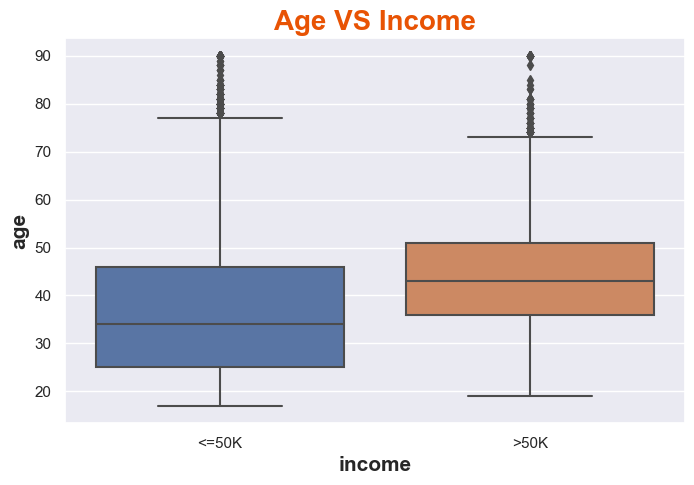

In [139]:
print(df.groupby("income").age.median())
plt.figure(figsize=(8,5))
plt.title("Age VS Income",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Age",weight='bold',fontsize=15)
sns.boxplot(data=df_analysis,x="income",y="age")
plt.show()

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Income and ِAge we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Increasing in age of person, increase probability of income &gt;50K
</p>
</div>


> **Income vs Hours per week**


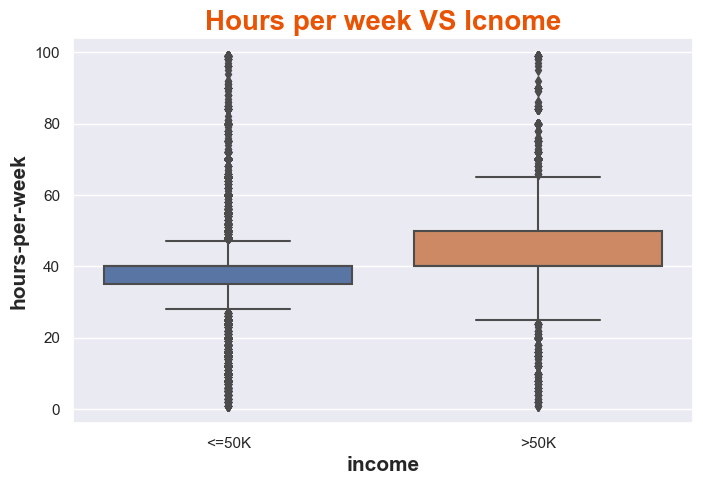

In [140]:
plt.figure(figsize=(8,5))
plt.title("Hours per week VS Icnome",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Hours Per Week",weight='bold',fontsize=15)
sns.boxplot(data=df_analysis,x="income",y="hours-per-week")
plt.show()

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Income and ِHours per week we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - Increasing in hours per week of person, increase probability of income &gt;50K
</p>
</div>

## **Multivariate Analysis**

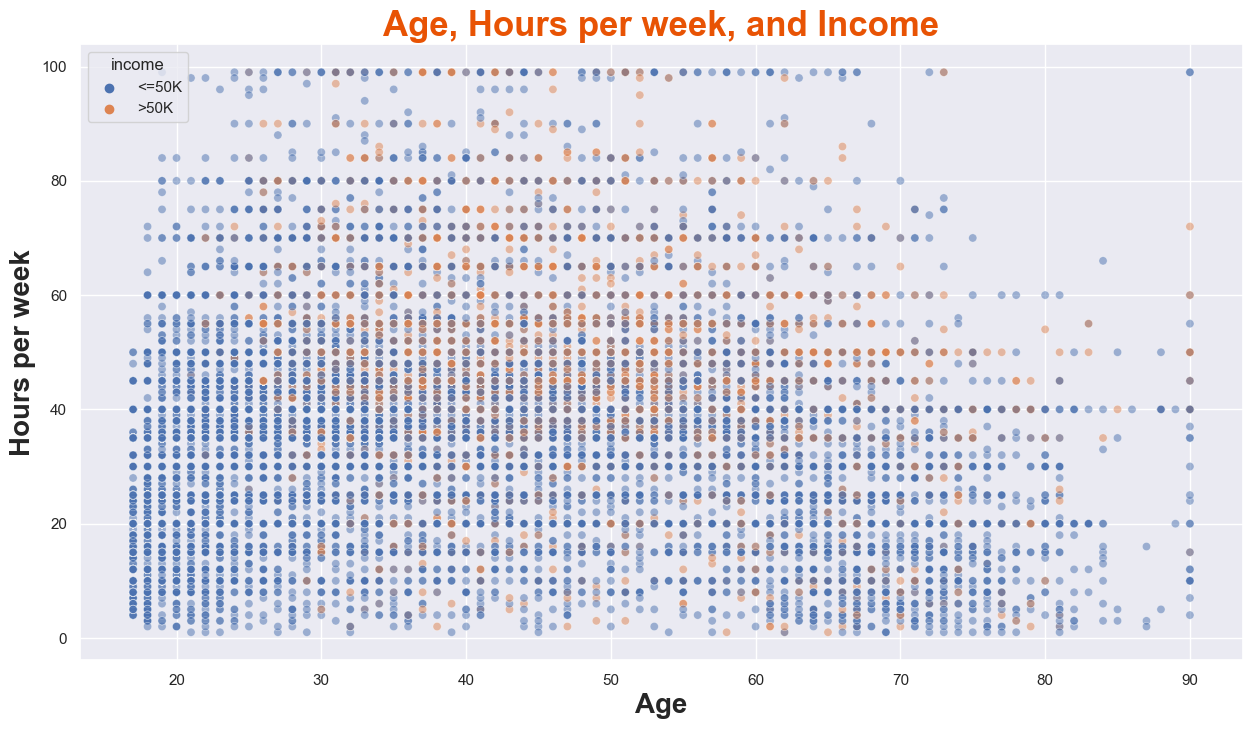

In [141]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_analysis,x="age",y="hours-per-week",hue="income",alpha=0.5)
plt.title("Age, Hours per week, and Income",fontsize=25,weight="bold",color="#e85304")
plt.xlabel("Age",fontsize=20,weight="bold")
plt.ylabel("Hours per week",fontsize=20,weight="bold")
plt.show()

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From analysis Age , Hours per week, and Income we can findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - This realtion is not linearly separable
</p>
</div>

# **Data Preprocessing⚙️**

## **Handling Duplicates**

In [142]:
num_of_duplicates = df.duplicated().sum()
if num_of_duplicates>0:
    df.drop_duplicates(inplace=True,ignore_index=True,keep="first")
    print(f"The number of duplicates rows was {num_of_duplicates} and now 0")
else :
    print("There is no duplicates")

The number of duplicates rows was 52 and now 0


## **Handling Null Values**

In [143]:
(round(df.isna().sum()*100/len(df),2)).sort_values(ascending=False)

occupation         5.75
workclass          5.73
native-country     1.75
age                0.00
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
relationship       0.00
race               0.00
gender             0.00
hours-per-week     0.00
capital            0.00
income             0.00
dtype: float64

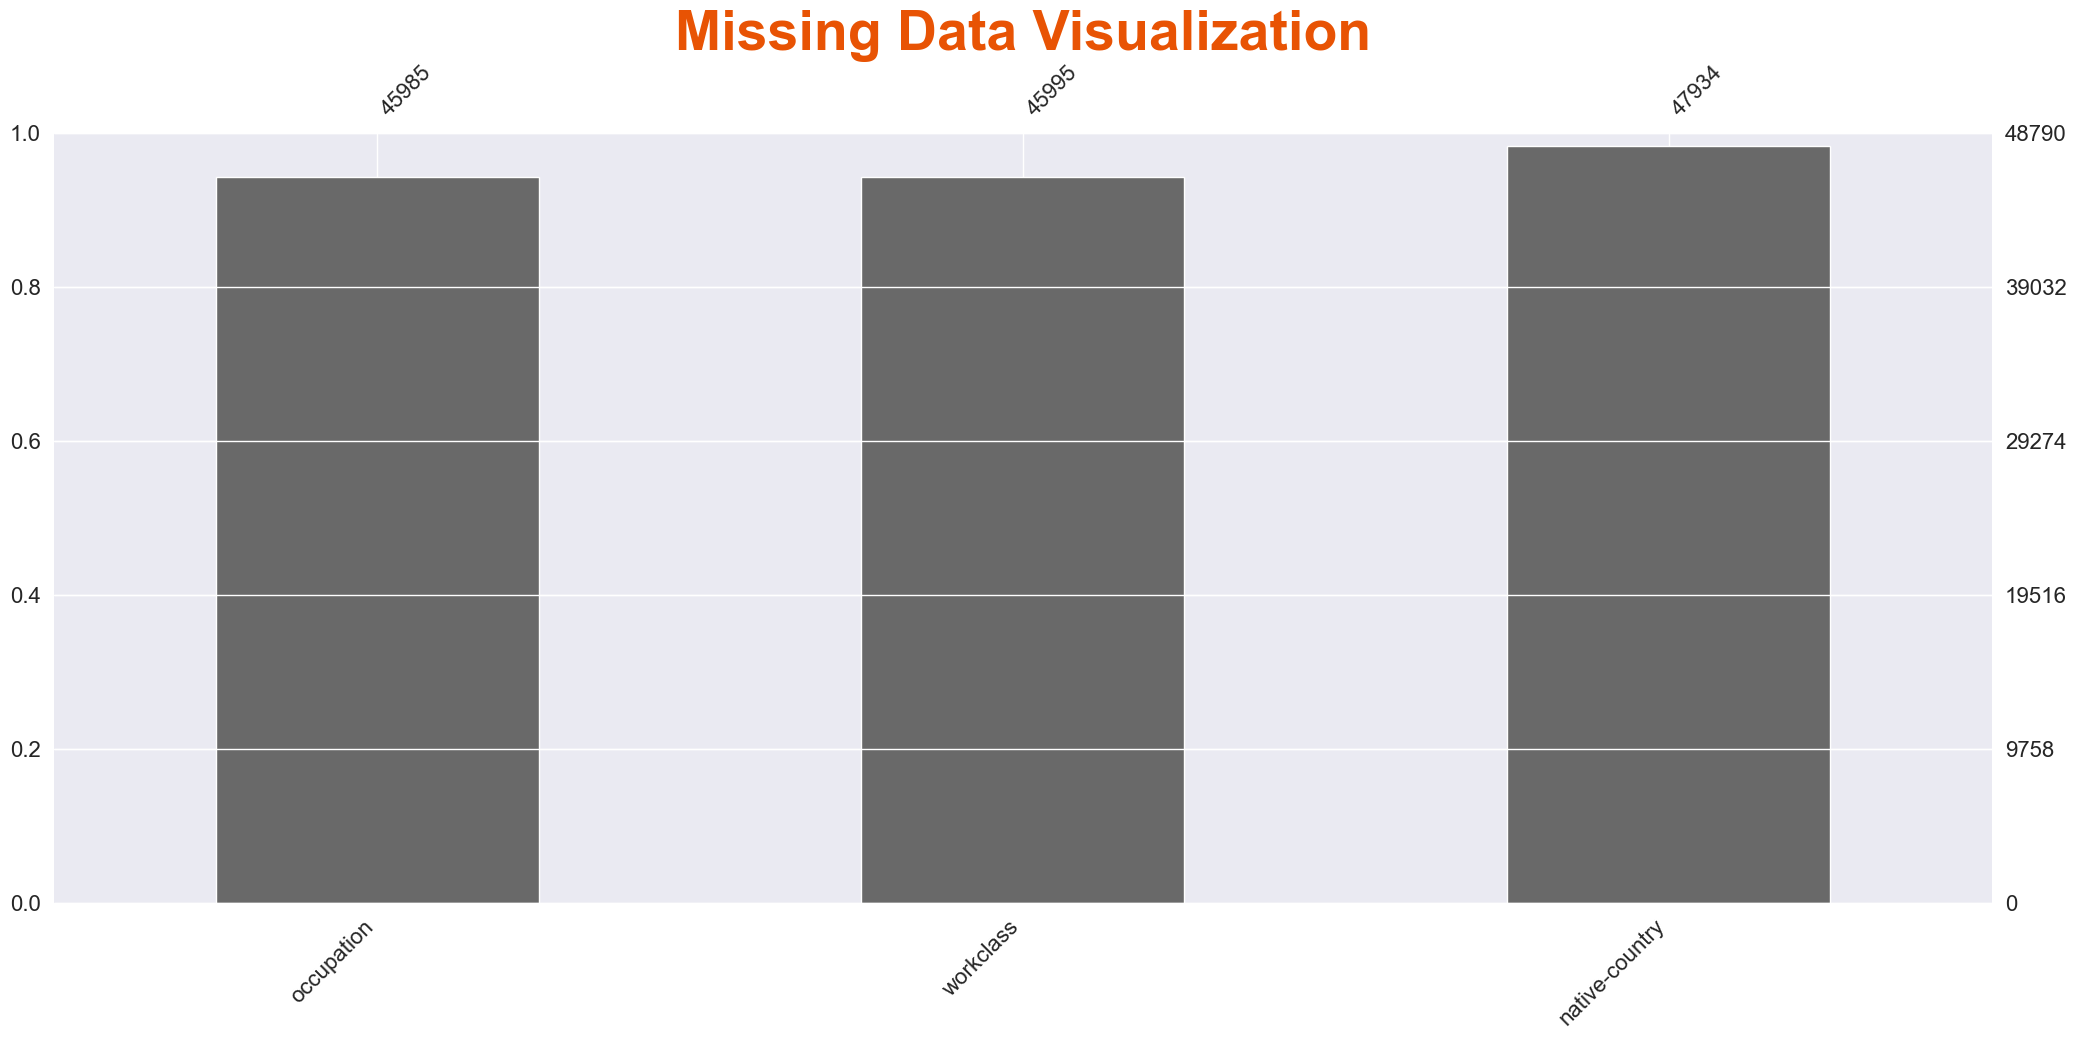

In [144]:
plt.figure(figsize=(7,5))
msno.bar(df[["occupation","workclass","native-country"]])
plt.title("Missing Data Visualization",fontsize=40,weight="bold",color="#e85304")
plt.show()

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c ">
<p style="color:#ffffff;font-weight: bold; margin-left:10px; ">   
- I will drop null values in native-country row
    <br>
- I will replace workclass column nulls with unknown and in occupation unknonw-job   
     <br>
- occupation column we find out from EDA that has null values:</p>
   <p style="color:#ffffff;font-weight:600; font-style:italic; margin-left:20px;"> 1. when workclass has value (Never-worked) so will handle it with value (No job) -> (MNAR)<br>
    2. when workclass has null values so it is (MAR) so its handle will be based on handling nulls in work class</p> 
</div>

In [145]:
# native-country column
df.dropna(subset=["native-country"],inplace=True)
# workclass column
df.fillna({"workclass":"Unknown"},inplace=True)
# Occupation column
df.loc[df["workclass"]=="Never-worked","occupation"]="No-job"
df.loc[df["workclass"]=="Unknown","occupation"]="Unknown-job"

In [146]:
print(f"The number of missing data now is: {df.isna().sum().sum()}")

The number of missing data now is: 0


## **Handling Outliers**

In [147]:
def outliers_handler(real_data:pd.DataFrame(),col_name:str)->pd.DataFrame():
    data=real_data.copy()
    q1 = np.percentile(data[col_name],25)
    q3 = np.percentile(data[col_name],75)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = (data[col_name]>upper_bound) | (data[col_name]<lower_bound)
    num_of_outliers = len(data[outliers])
    if num_of_outliers <= len(data)*0.1:
        data = data[~outliers]
        print("Outliers dropped")
    else:
        data.loc[data[col_name]>upper_bound,col_name] = upper_bound
        data.loc[data[col_name]<lower_bound,col_name] = lower_bound
        print("Outliers replaced")
    return data

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From EDA we findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - We don't need fnlwgt <br>
    - Educational num coulmn is encode for categorial column 
</p>
</div>

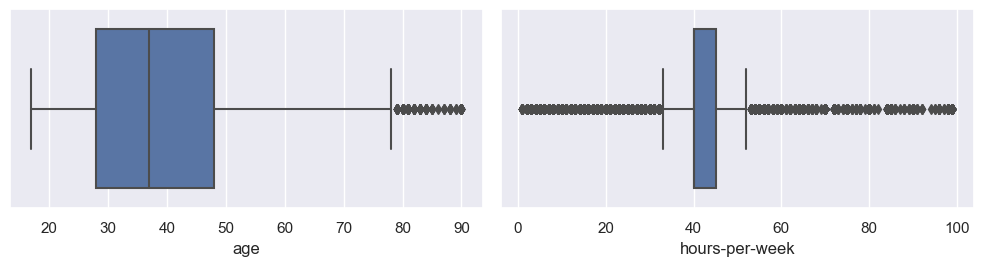

In [148]:
plt.figure(figsize=(10,5))
i=1
for col in df.select_dtypes(exclude="object").columns :
    if col in ["fnlwgt","educational-num"]:
        continue
    plt.subplot(2,2,i)
    sns.boxplot(data=df,x=col)
    i+=1
plt.tight_layout()
plt.show()

In [149]:
for i in ["age","hours-per-week"]:
    df=outliers_handler(df,i)

Outliers dropped
Outliers replaced


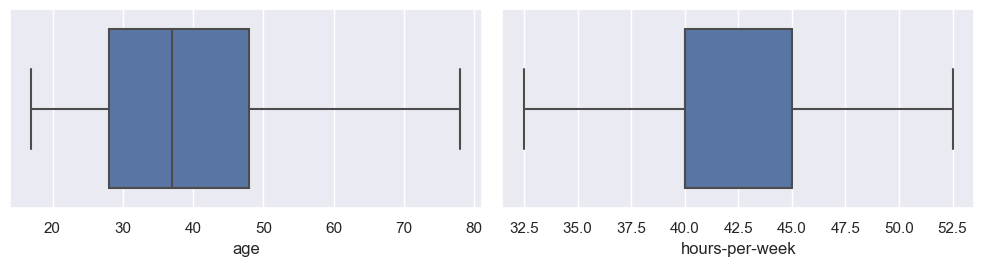

In [150]:
plt.figure(figsize=(10,5))
i=1
for col in df.select_dtypes(exclude="object").columns :
    if col in ["fnlwgt","educational-num"]:
        continue
    plt.subplot(2,2,i)
    sns.boxplot(data=df,x=col)
    i+=1
plt.tight_layout()
plt.show()

## **Feature Engineer & Feature Selection🧐**

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="font-size: 20px; color: #61f141 ; font-weight: bold; ">From EDA we findout:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - the most of columns has classes with too low freq trying to solve this I will merge minority classes in new class called others
</p>
</div>

In [151]:
df2=df.copy()
le=LabelEncoder()
for i in df2.select_dtypes(include="object"):
    df2[i]=le.fit_transform(df2[i])


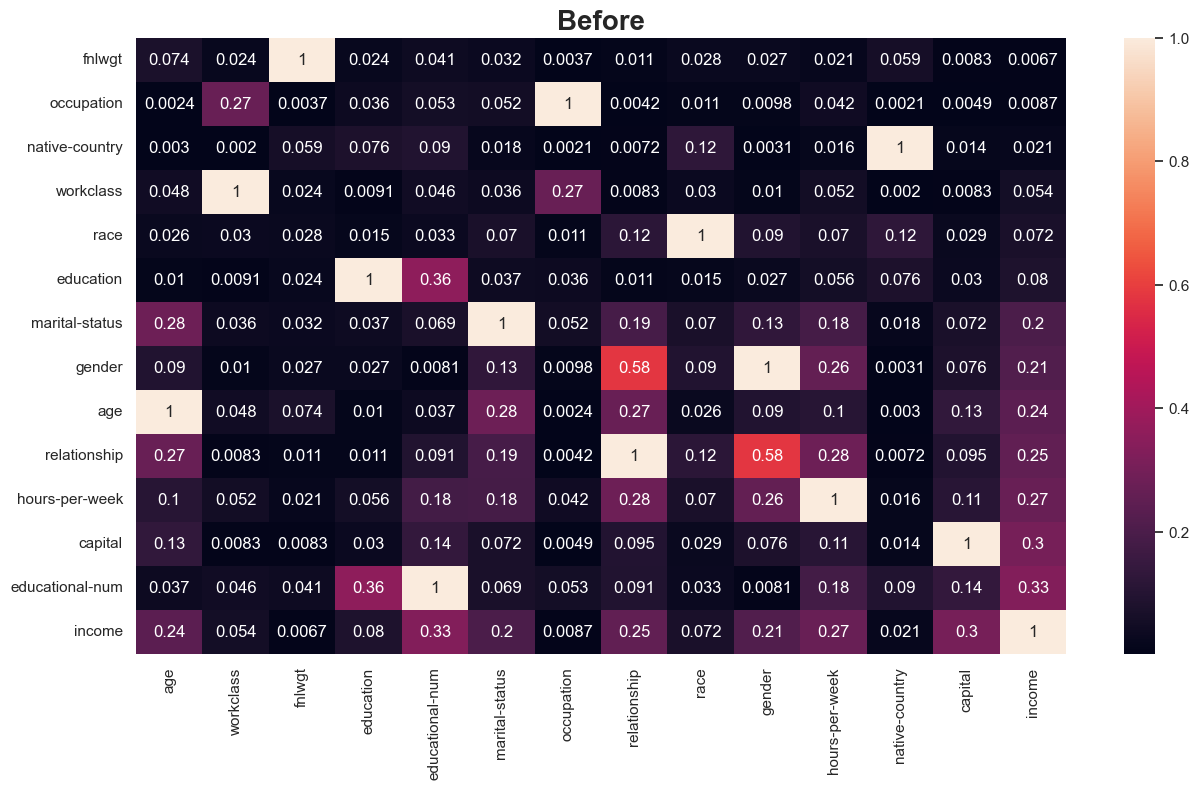

In [152]:
plt.figure(figsize=(15,8))
plt.title("Before",fontsize=20,weight="bold")
sns.heatmap(df2.corr().abs().sort_values("income"),annot=True)
plt.show()

      
> **Workclass column**


In [153]:
work=pd.DataFrame(round(df.workclass.value_counts()*100/len(df),2))
work

,workclass
Private,69.50
Self-emp-not-inc,7.87
Local-gov,6.47
Unknown,5.66
State-gov,4.08
Self-emp-inc,3.42
Federal-gov,2.94
Without-pay,0.04
Never-worked,0.02


In [154]:
df.loc[(df["workclass"]!="Private"),"workclass"]="Others"

    
> **Occupation column**


In [155]:
occ=pd.DataFrame(round(df.occupation.value_counts()*100/len(df),2))
display(occ)

,occupation
Craft-repair,12.58
Prof-specialty,12.52
Exec-managerial,12.46
Adm-clerical,11.56
Sales,11.28
Other-service,10.03
Machine-op-inspct,6.20
Unknown-job,5.66
Transport-moving,4.84
Handlers-cleaners,4.28


In [156]:
li=occ.tail(10).index.tolist()
df.loc[(df["occupation"].isin(li)),"occupation"]="Others"

In [157]:
df["educational-num"].value_counts()

9     15505
10    10684
13     7780
14     2566
11     2032
7      1794
12     1574
6      1364
4       902
15      797
5       743
8       631
16      558
3       483
2       231
1        80
Name: educational-num, dtype: int64

    
> **Education column**


In [158]:
ed=pd.DataFrame(round(df.education.value_counts()*100/len(df),2))
ed

,education
HS-grad,32.49
Some-college,22.39
Bachelors,16.30
Masters,5.38
Assoc-voc,4.26
11th,3.76
Assoc-acdm,3.30
10th,2.86
7th-8th,1.89
Prof-school,1.67


In [159]:
li=ed.tail(12).index.tolist()
df.loc[(df["education"].isin(li)),"education"]="Others"

  
> **Marital Status column**


In [160]:
marital=pd.DataFrame(round(df["marital-status"].value_counts()*100/len(df),2))
marital

,marital-status
Married-civ-spouse,45.81
Never-married,33.01
Divorced,13.72
Separated,3.15
Widowed,3.00
Married-spouse-absent,1.23
Married-AF-spouse,0.08


In [161]:
li=marital.tail(5).index.tolist()
df.loc[(df["marital-status"].isin(li)),"marital-status"]="Others"

   
> **Race column**


In [162]:
race=pd.DataFrame(round(df["race"].value_counts()*100/len(df),2))
race

,race
White,85.81
Black,9.52
Asian-Pac-Islander,2.90
Amer-Indian-Eskimo,0.98
Other,0.80


In [163]:
li=race.tail(3).index.tolist()
df.loc[(df["race"].isin(li)),"race"]="Others"

In [164]:
le =LabelEncoder()
for i in df.select_dtypes(include="object"):
    df[i]=le.fit_transform(df[i])


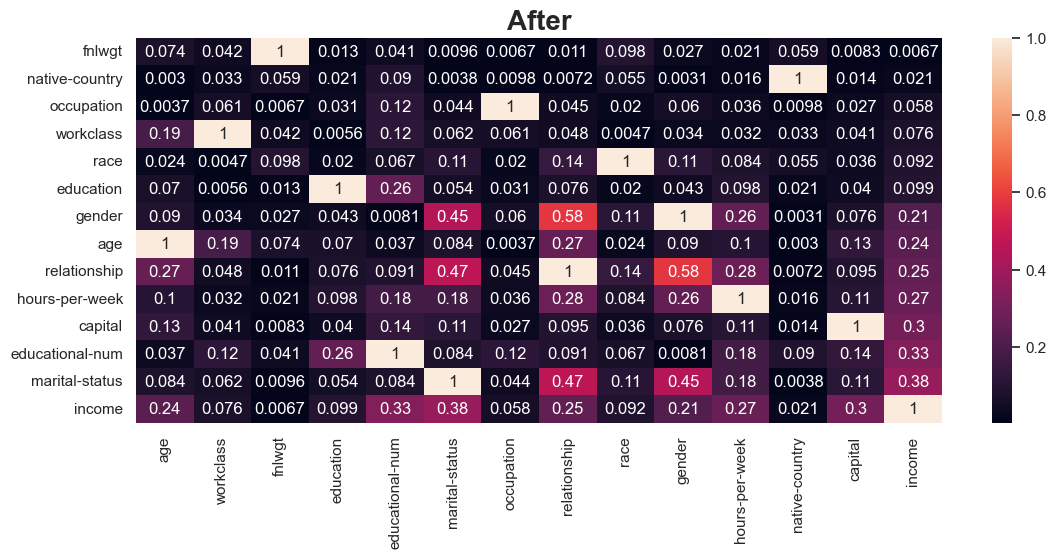

In [165]:
plt.figure(figsize=(13,5))
plt.title("After",fontsize=20,weight="bold")
sns.heatmap(df.corr().abs().sort_values("income"),annot=True)
plt.show()

In [166]:
df.drop(["fnlwgt","native-country","occupation","workclass","race","education","gender"],axis=1,inplace=True)

## **Spliting & Handling Imbalanced Data⚖️**

In [167]:
X=df.drop(["income"],axis=1)
y=df.income

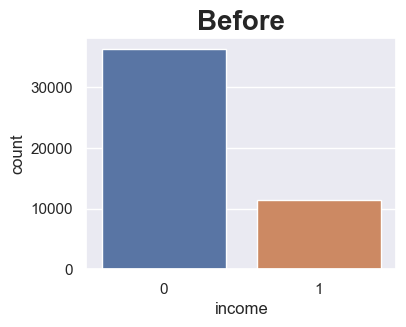

In [168]:
plt.figure(figsize=(4,3))
plt.title("Before",fontsize=20,weight="bold")
sns.countplot(x=y)
plt.show()

In [169]:
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

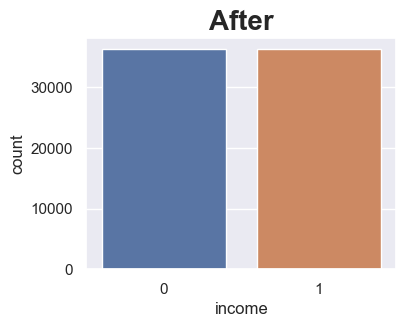

In [170]:
plt.figure(figsize=(4,3))
plt.title("After",fontsize=20,weight="bold")
sns.countplot(x=y)
plt.show()

In [171]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

## **Scaling📏**

 
> **Check if data need to scaling**


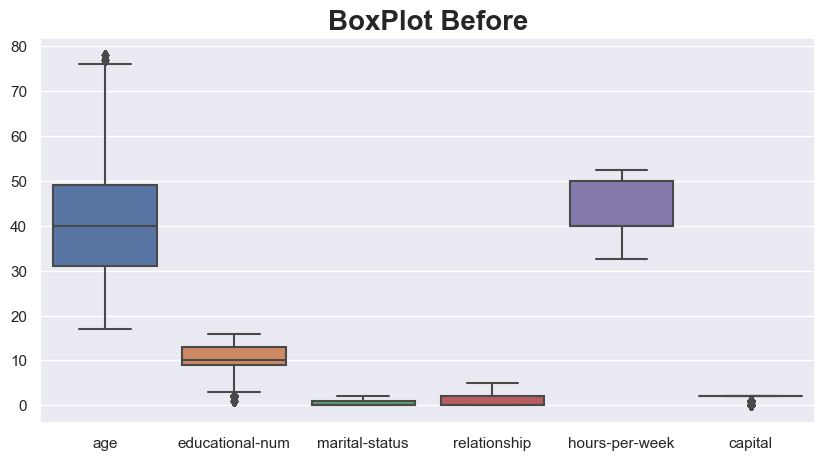

In [172]:
plt.figure(figsize=(10,5))
plt.title("BoxPlot Before",fontsize=20,weight="bold")
sns.boxplot(x_train)
plt.show()

   
> **As we see we need to scaling**


<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">

<p style="color:#ffffff;margin-left:10px; font-weight: bold;">
    - I will use MinMaxScaler because I handled outliers</p>
    <img src="https://miro.medium.com/v2/0*jLXgL0vdAo43ua0P.jpg" style="width: 400px; display: block; margin:auto; ">
</div>

In [173]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train=pd.DataFrame(x_train,columns=X.columns.tolist())
x_test=pd.DataFrame(x_test,columns=X.columns.tolist())

# **Working On Models🤖**

## **Logistic Regression**

### **Training Model**

   
> **I will use with logistic regression polynomial features**


In [174]:
poly=PolynomialFeatures(degree=4)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [175]:
logsig_poly=LogisticRegression()
logsig_poly.fit(x_train_poly,y_train)
y_pred_poly=logsig_poly.predict(x_test_poly)

### **Model Evaluation**

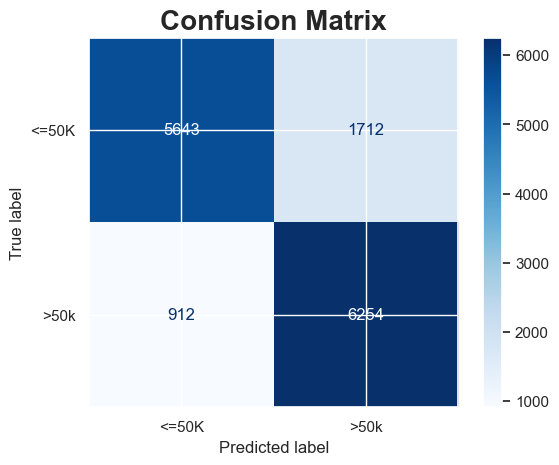

In [176]:
matrix=confusion_matrix(y_test,y_pred_poly)
figure=ConfusionMatrixDisplay(matrix,display_labels=["<=50K",">50k"])
figure.plot(cmap="Blues")
plt.title("Confusion Matrix",fontsize=20,weight="bold")
plt.show()

In [177]:
train_score_poly=logsig_poly.score(x_train_poly,y_train)
test_score_poly=logsig_poly.score(x_test_poly,y_test)
print(f"Train Score: {train_score_poly*100:.2f}\nTest Score: {test_score_poly*100:.2f}")
report=classification_report(y_test,y_pred_poly)
print(report)

Train Score: 82.14
Test Score: 81.93
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      7355
           1       0.79      0.87      0.83      7166

    accuracy                           0.82     14521
   macro avg       0.82      0.82      0.82     14521
weighted avg       0.82      0.82      0.82     14521



## **Decision Tree**

### **Hyperparameters Tuning**

In [178]:
par={
    "max_depth":(3,12),
    "criterion":(0,1),
    "min_impurity_decrease":(0,0.001)
}

def evaluation_func(par):
    max_depth=int(par[0])
    criterion="gini" if int(par[1])==0 else "entropy"
    min_impurity_decrease=float(par[2])
    clf=DecisionTreeClassifier(criterion=criterion
                               ,max_depth=max_depth
                               ,min_impurity_decrease=min_impurity_decrease
                               ,random_state=41)
    clf.fit(x_train,y_train)
    return - clf.score(x_test,y_test)

np.random.seed(41)
res = differential_evolution(evaluation_func,
                             bounds=list(par.values()),
                             maxiter=15,
                             mutation=0.9,
                             recombination=0.8,
                             popsize=20)

print(f"Parameters: {res.x}\nScore: {-res.fun*100:.2f}")

Parameters: [1.17763837e+01 3.40652101e-01 3.57470398e-05]
Score: 82.34


### **Training Model**

In [179]:
criterion = "gini" if int(res.x[1])==0 else "entropy"
print(f"Criterion --> {criterion}\n\n")
dst = DecisionTreeClassifier(criterion=criterion,
                             max_depth=int(res.x[0]),
                             min_impurity_decrease=float(res.x[2])
                             ,random_state=41)
dst.fit(x_train,y_train)

Criterion --> gini




DecisionTreeClassifier(max_depth=11,
                       min_impurity_decrease=3.574703976488901e-05,
                       random_state=41)

### **Model Evaluation**

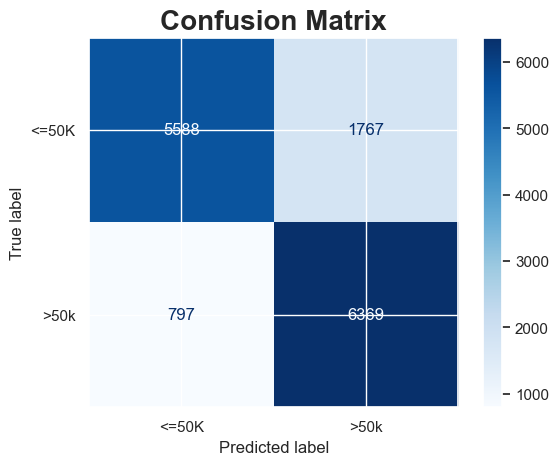

In [180]:
y_pred=dst.predict(x_test)
matrix=confusion_matrix(y_test,y_pred)
figure=ConfusionMatrixDisplay(matrix,display_labels=["<=50K",">50k"])
figure.plot(cmap="Blues")
plt.title("Confusion Matrix",fontsize=20,weight="bold")
plt.show()

In [181]:
train_score=dst.score(x_train,y_train)
test_score=dst.score(x_test,y_test)
print(f"Train Score: {train_score*100:.2f}\nTest Score: {test_score*100:.2f}")
report=classification_report(y_test,y_pred)
print(report)

Train Score: 83.51
Test Score: 82.34
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      7355
           1       0.78      0.89      0.83      7166

    accuracy                           0.82     14521
   macro avg       0.83      0.82      0.82     14521
weighted avg       0.83      0.82      0.82     14521



## **Random Forest**

### **Hyperparameters Tuning**

In [182]:
par={
    "max_depth": (2, 20),
    "n_estimators" : (100,300)
}

def evaluation_func(par):
    max_depth = int(par[0])
    n_estimators=int(par[1])
    clf= RandomForestClassifier(max_depth=max_depth,
                              n_estimators=n_estimators,
                              random_state=41)
    clf.fit(x_train,y_train)
    return - clf.score(x_test,y_test) # want to max


np.random.seed(41)
result = differential_evolution(
    evaluation_func,
    bounds=list(par.values()),
    maxiter=15,
    popsize=5,
    mutation=0.9,
    recombination=0.8,
)
print(f"Parameters: {result.x}\nScore: {-result.fun*100:.2f}")

Parameters: [ 17.71456423 251.86096274]
Score: 84.18


### **Trianing Model**

In [183]:
rfc = RandomForestClassifier(max_depth=int(result.x[0]),
                              n_estimators=int(result.x[1]),
                              random_state=41)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, n_estimators=251, random_state=41)

### **Model Evaluation**

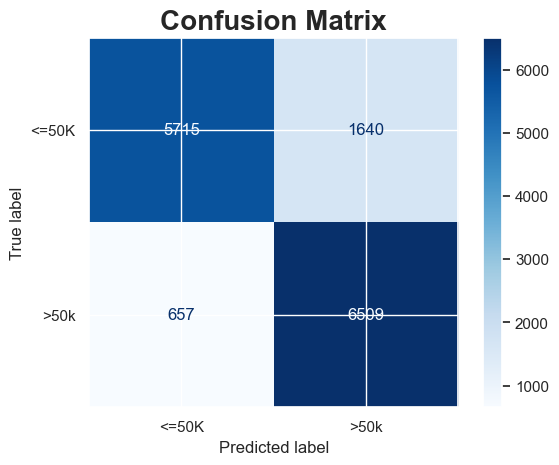

In [184]:
y_pred=rfc.predict(x_test)
matrix=confusion_matrix(y_test,y_pred)
figure=ConfusionMatrixDisplay(matrix,display_labels=["<=50K",">50k"])
figure.plot(cmap="Blues")
plt.title("Confusion Matrix",fontsize=20,weight="bold")
plt.show()

In [185]:
train_score=rfc.score(x_train,y_train)
test_score=rfc.score(x_test,y_test)
print(f"Train Score: {train_score*100:.2f}\nTest Score: {test_score*100:.2f}")
report=classification_report(y_test,y_pred)
print(report)

Train Score: 88.13
Test Score: 84.18
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      7355
           1       0.80      0.91      0.85      7166

    accuracy                           0.84     14521
   macro avg       0.85      0.84      0.84     14521
weighted avg       0.85      0.84      0.84     14521



## **KNN**

### **Hyperparameters Tuning**

In [186]:
par={
    "n_neighbors":(1,30)
}
knn=KNeighborsClassifier()
k=KFold(n_splits=5,shuffle=True,random_state=41)
grid = GridSearchCV(knn,par,cv=k)
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=41, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (1, 30)})

In [187]:
print(f"Best Score: {grid.best_score_*100:.2f}\nBest Parameters: {grid.best_params_}")
grid.best_estimator_

Best Score: 82.22
Best Parameters: {'n_neighbors': 30}


KNeighborsClassifier(n_neighbors=30)

### **Training Model**

In [188]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"])
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

### **Model Evaluation**

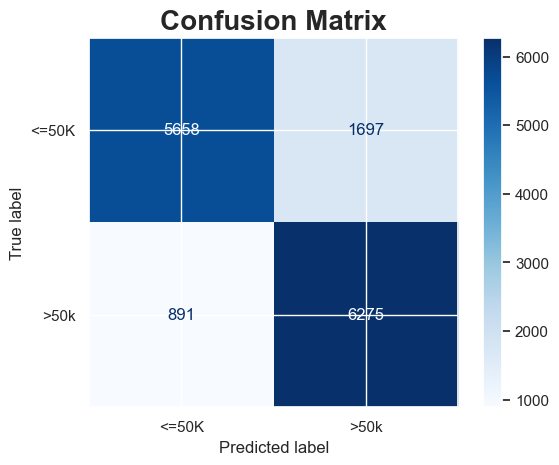

In [189]:
y_pred=knn.predict(x_test)
matrix=confusion_matrix(y_test,y_pred)
figure=ConfusionMatrixDisplay(matrix,display_labels=["<=50K",">50k"])
figure.plot(cmap="Blues")
plt.title("Confusion Matrix",fontsize=20,weight="bold")
plt.show()

In [190]:
train_score=knn.score(x_train,y_train)
test_score=knn.score(x_test,y_test)
print(f"Train Score: {train_score*100:.2f}\nTest Score: {test_score*100:.2f}")
report=classification_report(y_test,y_pred)
print(report)

Train Score: 83.14
Test Score: 82.18
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      7355
           1       0.79      0.88      0.83      7166

    accuracy                           0.82     14521
   macro avg       0.83      0.82      0.82     14521
weighted avg       0.83      0.82      0.82     14521



# **END OF THE NOTEBOOK👋🏻**

<div style="color:#ffffff;border:3px solid  #85929e; border-radius:10px; padding:10px;background-color:#2c2c2c">
<p style="color:#ffffff;font-size: 20px; color: #61f141 ; font-weight: bold; ">As we see from working on models:</p>
<p style="color:#ffffff;margin-left:10px;font-style:italic; font-weight: bold;">
    - The best 2 models is Decision Tree and XGBoosting<br>
    - I will prefer XGBoosting because it is more efficient and faster than Decision Tree</p>
</div>

<div style="border:5px solid #85929e; border-radius:10px; padding:110px; background-color:#2c2c2c">

<p style="font-size: 50px; text-align: center; color: #1baad4 ; font-family:freestyle script; font-weight: bold;">Thanks & Waiting for your feedback🖤<br>Follow for more notebooks➕</p>
</div>